## Problem Description

In this problem, we have a dataset about students admisson  named `college_admissions.csv`. The dataset is a classification dataset which determines if a student can get admission based on their `gre,gpa and rank`. In the dataset, feature `gre` contains outlier data which we need to remove.

In this problem, the solution steps are given but each step contains some errors in them(some steps may not have any error). We have to correct the errors in each step and move on to the next in order completely remove the outliers from `gre` feature.

For each step given below, follow the instructions in them and move on to the next one to finally remove the outliers from `gre` column and see the results.
Some steps might not show any error message but they will give an unexpected output which is also an error.




#### Load the dataset:

 - Run the cell below and see the error message
 - Correct the error(s) and run cell again

In [32]:
import pandas as pd

gredata= pd.read_csv("../datasets/college_admissions.csv") 

- Run the cell below:
    

In [33]:
gredata

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


#### Where is data shown above saved in?
(Type answer here)
Ans: in the gredata variable

## Check for Outliers in the `gre` data

### Plot a strip plot to check for outliers

 - Run the cell below and see the error message
 - Correct the error(s) and run cell again

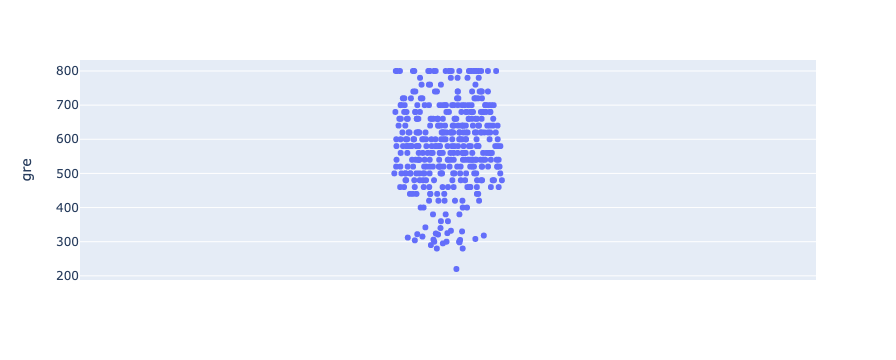

In [34]:
import plotly.express as px

fig= px.strip(gredata, y='gre') 

fig.show()


#### What is the maximum value in this plot?
(Type answer here)

Ans: 800

### Plot a boxplot for outlier estimation

 - Run the cell below and see the error message
 - Correct the error(s) and run cell again

<AxesSubplot:>

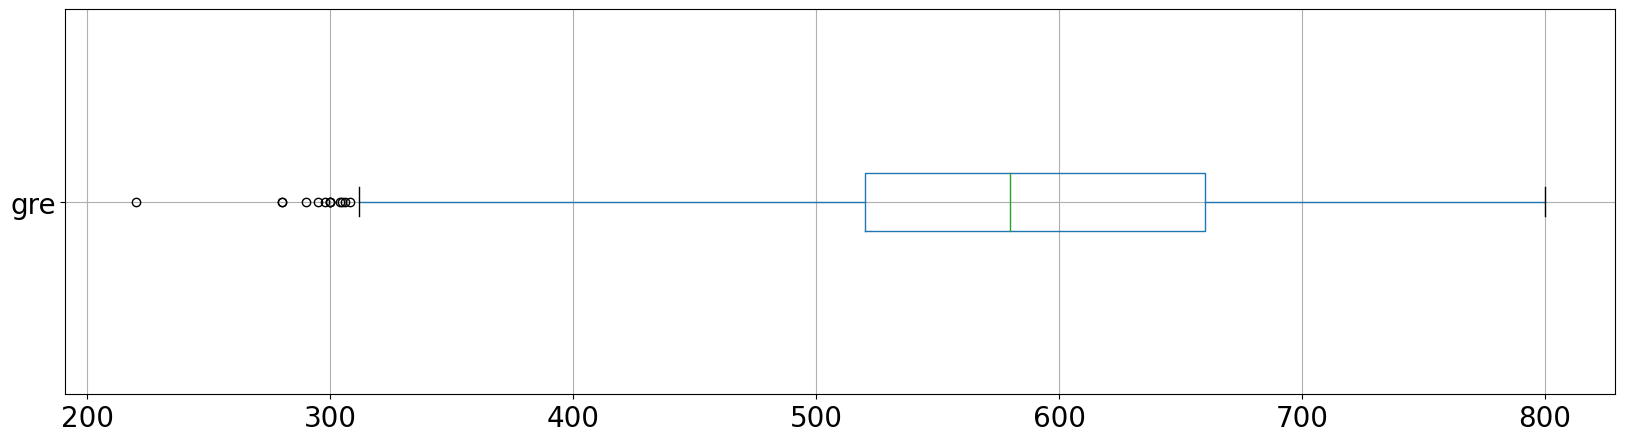

In [35]:
box1= gredata.boxplot(column='gre', figsize=(20,5), fontsize='20', vert=False) 

box1

From the boxplot we got, where do the outliers apprximately lie?

(Type answer here)

### Use `describe()` for `gre` distribution by numbers:

 - Run the cell below and see the error message
 - Correct the error(s) and run cell again

In [36]:
gredata['gre'].describe()

count    400.000000
mean     584.217500
std      122.428866
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

## Find the outlier points:

### Find the upper and lower bounds:

 - Run the cell below and see the error message 
 - Correct the error(s) and run cell again

### Calculate Q1:

In [37]:
q1= gredata['gre'].quantile(.25)

print(f"q1: {q1}")

q1: 520.0


- Run the cell below and see the error message 
- Correct the error(s) and run cell again

### Calculate Q3:

In [38]:
q3= gredata['gre'].quantile(.75)

print(f"q3: {q3}")

q3: 660.0


### Find the interquartile range:

 - Run the cell below and see the error message
 - Correct the error(s) and run cell again

In [39]:
iqr= q3 - q1

print(f"iqr: {iqr}")

iqr: 140.0


### Calculate the upper and lower bound for outliers:

 - Run the cell below and see the error message
 - Correct the error(s) and run cell again

In [40]:
upper_bound= q3 + 1.5*iqr

lower_bound= q1 - 1.5*iqr

print("upper bound",upper_bound)
print("lower bound",lower_bound)

upper bound 870.0
lower bound 310.0


### Clipping points:

 - Run the cell below and see the error message
 - Correct the error(s) and run cell again

In [41]:
lower_point= max(lower_bound, gredata['gre'].min())

print("lower_point", lower_point)

upper_point= min(upper_bound, gredata['gre'].max()) 

print("upper_point", upper_point)

lower_point 310.0
upper_point 800


## Clip the Outliers:

### Clip `price` data with lower and upper limit:

 - Check the code cell below
 - Find the error in it
 - Correct the error(s) and run the cell

In [42]:
gredata['gre']= gredata['gre'].clip(lower_point, upper_point)  

### Check `gre` distribution after clipping

 - Run the cell below 

In [43]:
gredata['gre'].describe()

count    400.000000
mean     584.827500
std      120.935422
min      310.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

## Distribution after clipping data

 - Run the cell below and see the error message
 - Correct the error(s) and run cell again

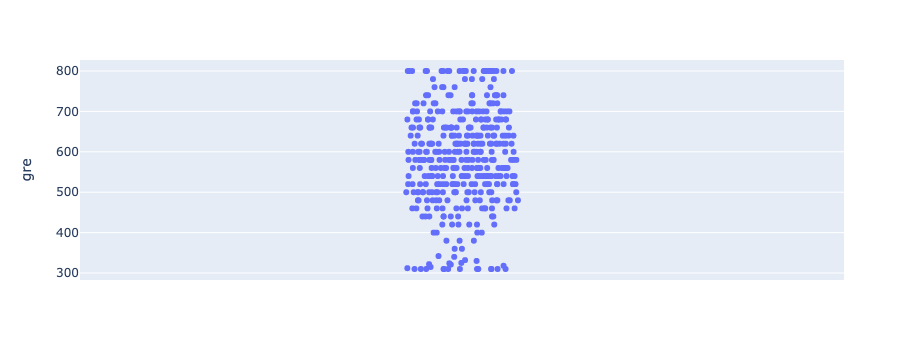

In [45]:
fig= px.strip(gredata, y='gre') 

fig.show()

### What is the minimum value of this plot?

(type answer here)

 - Run the cell below and see the error message
 - Correct the error(s) and run cell again

<AxesSubplot:>

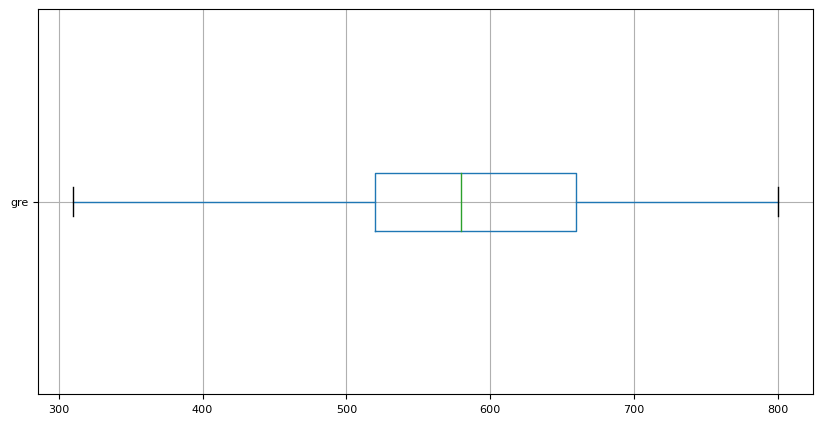

In [46]:
box2= gredata.boxplot(column='gre', figsize=(10,5), fontsize='8', vert=False)
box2